###Imports

In [1]:
import os
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.layers import GlobalAveragePooling2D, Rescaling

import time
import matplotlib.pyplot as plt
import os

### Ensure GPU is enabled

In [20]:
GPU = tf.test.gpu_device_name()
if GPU != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(GPU))

Found GPU at: /device:GPU:0


### Connect to google drive

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Move to the right folder

In [15]:
%cd gdrive/MyDrive/Colab\ Notebooks
%cd ti6

[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks'
/content/gdrive/MyDrive/Colab Notebooks/ti6


# Code

In [16]:
%pwd

'/content/gdrive/MyDrive/Colab Notebooks/ti6'

In [25]:
tf.config.experimental.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [17]:
PATH_MERGED = './datasets/merged_ds/'

In [27]:
def plot_results(history, epochs_range):
    '''
    Plota um gráfico com os resultados do modelo
    '''
    print('-------Salvando gráfico-------')
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    os.makedirs('_graficos', exist_ok=True)
    plt.savefig('_graficos/experiment_gpu_distributed.jpg')


Found 9780 files belonging to 2 classes.
Using 6846 files for training.
Found 9780 files belonging to 2 classes.
Using 2934 files for validation.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 46,


Epoch 1: val_accuracy improved from -inf to 0.74097, saving model to ./datasets/models/test-01-0.647-0.741.model


214/214 [==============================] - 72s 311ms/step - loss: 0.6536 - accuracy: 0.6472 - val_loss: 0.5458 - val_accuracy: 0.7410
Epoch 2/12
214/214 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.7524
Epoch 2: val_loss improved from 0.54582 to 0.45253, saving model to ./datasets/models/test-02-0.752-0.791.model



Epoch 2: val_accuracy improved from 0.74097 to 0.79107, saving model to ./datasets/models/test-02-0.752-0.791.model


214/214 [==============================] - 68s 313ms/step - loss: 0.5115 - accuracy: 0.7524 - val_loss: 0.4525 - val_accuracy: 0.7911
Epoch 3/12
213/214 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.7798
Epoch 3: val_loss did not improve from 0.45253

Epoch 3: val_accuracy did not improve from 0.79107
214/214 [==============================] - 65s 302ms/step - loss: 0.4693 - accuracy: 0.7800 - val_loss: 0.4544 - val_accuracy: 0.7873
Epoch 4/12
214/214 [==============================] - ETA: 0s - loss: 0.4221 - accuracy: 0.8079
Epoch 4: val_loss improved from 0.45253 to 0.39405, saving model to ./datasets/models/test-04-0.808-0.821.model



Epoch 4: val_accuracy improved from 0.79107 to 0.82106, saving model to ./datasets/models/test-04-0.808-0.821.model


214/214 [==============================] - 68s 317ms/step - loss: 0.4221 - accuracy: 0.8079 - val_loss: 0.3940 - val_accuracy: 0.8211
Epoch 5/12
214/214 [==============================] - ETA: 0s - loss: 0.3852 - accuracy: 0.8273
Epoch 5: val_loss improved from 0.39405 to 0.36030, saving model to ./datasets/models/test-05-0.827-0.835.model



Epoch 5: val_accuracy improved from 0.82106 to 0.83538, saving model to ./datasets/models/test-05-0.827-0.835.model


214/214 [==============================] - 64s 296ms/step - loss: 0.3852 - accuracy: 0.8273 - val_loss: 0.3603 - val_accuracy: 0.8354
Epoch 6/12
214/214 [==============================] - ETA: 0s - loss: 0.3754 - accuracy: 0.8297
Epoch 6: val_loss did not improve from 0.36030

Epoch 6: val_accuracy did not improve from 0.83538
214/214 [==============================] - 65s 300ms/step - loss: 0.3754 - accuracy: 0.8297 - val_loss: 0.3925 - val_accuracy: 0.8279
Epoch 7/12
214/214 [==============================] - ETA: 0s - loss: 0.3617 - accuracy: 0.8402
Epoch 7: val_loss did not improve from 0.36030

Epoch 7: val_accuracy did not improve from 0.83538
214/214 [==============================] - 66s 302ms/step - loss: 0.3617 - accuracy: 0.8402 - val_loss: 0.3786 - val_accuracy: 0.8272
Epoch 8/12
214/214 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8462
Epoch 8: val_loss improved from 0.36030 to 0.35487, saving model to ./datasets/models/test-08-0.846-0.846.model



Epoch 8: val_accuracy improved from 0.83538 to 0.84560, saving model to ./datasets/models/test-08-0.846-0.846.model


214/214 [==============================] - 65s 297ms/step - loss: 0.3428 - accuracy: 0.8462 - val_loss: 0.3549 - val_accuracy: 0.8456
Epoch 9/12
214/214 [==============================] - ETA: 0s - loss: 0.3290 - accuracy: 0.8577
Epoch 9: val_loss improved from 0.35487 to 0.31588, saving model to ./datasets/models/test-09-0.858-0.867.model



Epoch 9: val_accuracy improved from 0.84560 to 0.86673, saving model to ./datasets/models/test-09-0.858-0.867.model


214/214 [==============================] - 65s 303ms/step - loss: 0.3290 - accuracy: 0.8577 - val_loss: 0.3159 - val_accuracy: 0.8667
Epoch 10/12
213/214 [============================>.] - ETA: 0s - loss: 0.3225 - accuracy: 0.8599
Epoch 10: val_loss improved from 0.31588 to 0.31354, saving model to ./datasets/models/test-10-0.860-0.865.model



Epoch 10: val_accuracy did not improve from 0.86673
214/214 [==============================] - 66s 303ms/step - loss: 0.3226 - accuracy: 0.8599 - val_loss: 0.3135 - val_accuracy: 0.8650
Epoch 11/12
213/214 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.8735
Epoch 11: val_loss did not improve from 0.31354

Epoch 11: val_accuracy did not improve from 0.86673
214/214 [==============================] - 63s 290ms/step - loss: 0.2969 - accuracy: 0.8736 - val_loss: 0.3246 - val_accuracy: 0.8661
Epoch 12/12
213/214 [============================>.] - ETA: 0s - loss: 0.2988 - accuracy: 0.8690
Epoch 12: val_loss did not improve from 0.31354

Epoch 12: val_accuracy improved from 0.86673 to 0.87048, saving model to ./datasets/models/test-12-0.869-0.870.model


214/214 [==============================] - 67s 310ms/step - loss: 0.2990 - accuracy: 0.8688 - val_loss: 0.3222 - val_accuracy: 0.8705
Tempo de treinamento: 878.1652059555054 segundos
-------Salvando gráfico-------


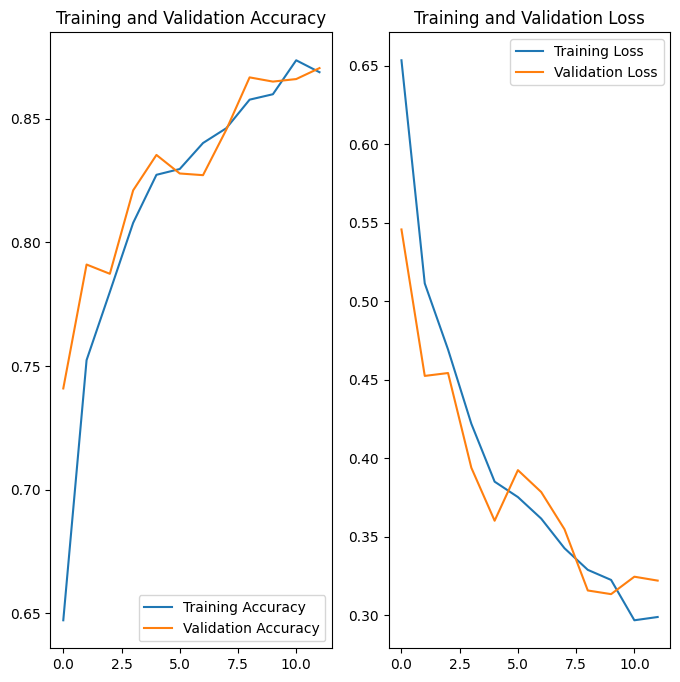

In [30]:
def createModel(input_shape):
    # Definimos que estamos criando um modelo sequencial
    model = Sequential()

    # Primeira camada do modelo:
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda camada do modelo:
    model.add(Conv2D(64, (3, 3),  activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Terceira camada do modelo:
    model.add(Conv2D(128, (3, 3),  activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    return model


def run():
    input_shape = (200, 200, 3)  # Height, Width, Depth (1 -> cinza, 3 -> rgb)
    height = 200
    width = 200
    batch_size = 32
    epochs = 12
    model_path = os.path.join('./datasets/models/', "test-{epoch:02d}-{accuracy:.3f}-{val_accuracy:.3f}.model")

    train_ds = tf.keras.utils.image_dataset_from_directory(
        PATH_MERGED,
        seed=123,
        validation_split=0.3,
        subset="training",
        color_mode="rgb",
        image_size=(height, width),
        batch_size=batch_size,
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        PATH_MERGED,
        seed=123,
        validation_split=0.3,
        subset="validation",
        color_mode="rgb",
        image_size=(height, width),
        batch_size=batch_size,
    )

    # rescaling os valores de RGB entre 0 e 1
    rescaling_layer = Rescaling(1./255)

    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip('horizontal_and_vertical', input_shape=input_shape),
        layers.RandomRotation(0.2),
    ])

    train_ds = train_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # By encapsulating the model creation and compilation within the with tf.device(GPU): block, 
    # we ensure that the operations are executed on the specified GPU. 
    # This allows for efficient utilization of GPU resources, 
    # which can significantly accelerate the training process for deep learning models.
    with tf.device(GPU):    
      model = createModel(input_shape)
      model.compile(optimizer='adam',
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"],)

    model.summary()

    checkpoint_loss = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    checkpoint_acc = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    checkpoints = [checkpoint_loss, checkpoint_acc]
    
    start = time.time()
    H = model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=epochs,
                  verbose=1,
                  callbacks=checkpoints,)
    end = time.time()

    print(f"Tempo de treinamento: {end - start} segundos")

    plot_results(H.history, range(epochs))


run()